In [1]:
# Importação de Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# Leitura de Dados no formato .CSV
bmw = pd.read_csv("bmw.csv", sep=';')
bmw.head() # primeiros 5 registros

,CustomerID,Dealership,Showroom,ComputerSearch,M5,3Series,Z4,Financing,Purchase
0,1,1,0,0,0,0,0,0,0
1,2,1,1,1,0,0,0,1,0
2,3,1,0,0,0,0,0,0,0
3,4,1,1,1,1,0,0,1,1
4,5,1,0,1,1,1,0,1,1


In [3]:
# Informações quantitativas do dataset: 100 linhas e 9 colunas
bmw.shape

(100, 9)

In [4]:
# Para Agrupamento (clustering), feature "id" não é bem-vinda!
# Vamos excluir o CustomerID..Vamos lá !
# Agora ficará: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
Xbmw = bmw.iloc[:, 1:9].values

In [5]:
# Criação do modelo de Agrupamento (Clustering) usando K-Means
# Parametrizando K-Means com 3 Clusters e Metodo de Inicialização Randômica
kmeans = KMeans(n_clusters = 3, init = 'random')
kmeans

KMeans(init='random', n_clusters=3)

In [6]:
# Treino do modelo com os Dados
kmeans.fit(Xbmw)

KMeans(init='random', n_clusters=3)

In [7]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[8.04347826e-01, 6.52173913e-01, 4.56521739e-01, 8.04347826e-01,
        3.26086957e-01, 3.91304348e-01, 1.00000000e+00, 6.52173913e-01],
       [9.37500000e-02, 1.00000000e+00, 3.75000000e-01, 3.12500000e-02,
        1.00000000e+00, 6.56250000e-01, 4.68750000e-01, 2.81250000e-01],
       [9.09090909e-01, 4.54545455e-01, 4.54545455e-01, 6.81818182e-01,
        3.63636364e-01, 2.72727273e-01, 1.11022302e-16, 5.55111512e-17]])

In [8]:
# Treinando novamente o modelo com os Dados - Observe que novos Centroids são calculados (inicialização randômica!)
kmeans.fit(Xbmw)

KMeans(init='random', n_clusters=3)

In [9]:
# Exibindo os Centroids - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[ 8.97435897e-01,  5.89743590e-01,  4.61538462e-01,
         6.92307692e-01,  3.58974359e-01,  3.84615385e-01,
         4.35897436e-01, -1.66533454e-16],
       [ 6.45161290e-02,  1.00000000e+00,  3.54838710e-01,
         3.22580645e-02,  1.00000000e+00,  6.77419355e-01,
         4.51612903e-01,  2.90322581e-01],
       [ 7.66666667e-01,  6.00000000e-01,  4.66666667e-01,
         8.33333333e-01,  3.33333333e-01,  3.00000000e-01,
         1.00000000e+00,  1.00000000e+00]])

In [11]:
# Executa K-Means para agrupar os dados e retorna Tabela de Distancias (fit_transform)
# Calcula a distância entre os dados de cada linha (instância) e cada um dos 3 clusters
distance = kmeans.fit_transform(Xbmw)
distance

array([[1.93629015, 1.23183714, 1.87823794],
       [1.7709648 , 1.24220118, 1.54739925],
       [1.93629015, 1.23183714, 1.87823794],
       [2.11923454, 1.46916588, 0.85309893],
       [2.11923454, 1.61863734, 1.12299204],
       [1.42812539, 1.30265495, 1.93074539],
       [2.13440183, 1.65001544, 1.26271313],
       [1.74342827, 1.36981645, 1.9818622 ],
       [1.46161429, 1.35096819, 1.65159855],
       [2.03379358, 1.68841822, 1.288841  ],
       [1.9279423 , 1.36042496, 1.63129124],
       [2.1494621 , 1.20020818, 1.82421977],
       [2.34332137, 1.52903092, 0.96321222],
       [1.66777625, 1.33185322, 1.67165919],
       [1.90267898, 1.31245989, 1.91340302],
       [1.86846328, 1.56220987, 1.03010248],
       [2.13440183, 1.65001544, 1.26271313],
       [2.03379358, 1.31245989, 1.61072792],
       [1.63850646, 1.11147266, 1.73044631],
       [2.16441757, 1.06433423, 1.69148193],
       [1.78908705, 1.66548281, 1.33956875],
       [2.04959324, 1.71852267, 1.41224801],
       [1.

In [12]:
# Para cada uma das 100 linhas do dataset, a qual dos 3 clusters ela pertence..0, 1 ou 2 ?
# São 100 elementos no array, um por linha
labels = kmeans.labels_
labels

array([1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1,
       1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# Exibindo novamente os Centroids (atualizados) - São 3 grupos, portanto, 3 linhas com 8 colunas = 8 features
kmeans.cluster_centers_

array([[ 6.45161290e-02,  1.00000000e+00,  3.54838710e-01,
         3.22580645e-02,  1.00000000e+00,  6.77419355e-01,
         4.51612903e-01,  2.90322581e-01],
       [ 8.97435897e-01,  5.89743590e-01,  4.61538462e-01,
         6.92307692e-01,  3.58974359e-01,  3.84615385e-01,
         4.35897436e-01, -1.66533454e-16],
       [ 7.66666667e-01,  6.00000000e-01,  4.66666667e-01,
         8.33333333e-01,  3.33333333e-01,  3.00000000e-01,
         1.00000000e+00,  1.00000000e+00]])

In [21]:
Xbmw

array([[1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [1, 1, 1, 1, 0, 0, 1, 1],
       [1, 0, 1, 1, 1, 0, 1, 1],
       [1, 1, 1, 0, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 1, 1, 1, 1],
       [1, 0, 1, 1, 1, 1, 1, 0],
       [1, 0, 1, 1, 0, 1, 0, 0],
       [1, 0, 1, 1, 0, 0, 1, 1],
       [1, 1, 1, 0, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0],
       [1, 1, 1, 1, 1, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 1],
       [1, 0, 1, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 0, 0, 0, 0],
       [1, 1, 1, 0, 0, 1, 1, 1],
       [1, 0, 1, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 0, 0, 1, 0],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 0, 1, 1, 0, 1, 0],
       [1, 1, 1, 1, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1, 1, 0],
       [1,

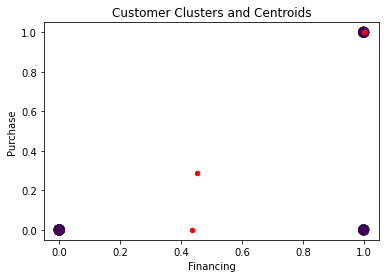

In [14]:
# Visualizando os Clusters - Exemplo 1
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(Xbmw[:, 6], Xbmw[:,7], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 6], kmeans.cluster_centers_[:, 7], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('Financing')
plt.ylabel('Purchase')
plt.show()

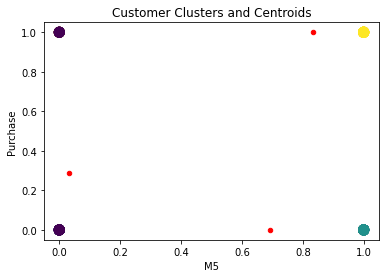

In [15]:
# Visualizando os Clusters - Exemplo 2
# Dados: 0.Dealership, 1.Showroom, 2.ComputerSearch, 3.M5, 4.3Series, 5.Z4, 6.Financing, 7.Purchase
plt.scatter(Xbmw[:, 3], Xbmw[:, 7], s = 100, c = kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:, 3], kmeans.cluster_centers_[:, 7], s = 20, c = 'red')
plt.title('Customer Clusters and Centroids')
plt.xlabel('M5')
plt.ylabel('Purchase')
plt.show()

In [16]:
# Cálculo do WCSSE - Within Cluster Sum of Squared Errors
wcsse = []
maxclusters = 11
for i in range(1, maxclusters):
    kmeans = KMeans(n_clusters = i, init = 'random')
    kmeans.fit(Xbmw)
    print (i,kmeans.inertia_)
    wcsse.append(kmeans.inertia_)

1 190.6600000000001
2 149.57352941176475
3 126.76137303556656
4 113.79649170274172
5 104.4473533286834
6 94.8972826086957
7 86.16760820878471
8 79.97937617937615
9 74.64372294372295
10 67.37682317682315


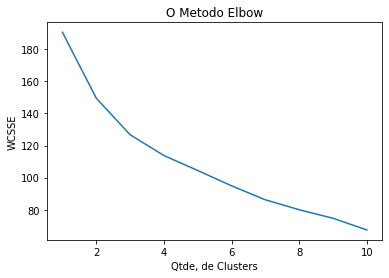

In [17]:
# Plotagem do Gráfico para visualização do "cotovelo" - Método de Elbow
# Ao final do Estudo do Metodo de Elbow a seguir, foram gerados 11 clusters
plt.plot(range(1, maxclusters), wcsse)
plt.title('O Metodo Elbow')
plt.xlabel('Qtde, de Clusters')
plt.ylabel('WCSSE') # Within Cluster Sum of Squares
plt.show()

In [18]:
# Para o cliente 1 => Dealership=1, Showroom=1, ComputerSearch=1, M5=1, 3Series=1,
#                Z4=1, Financing=1, Purchase=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=4
newcustomer1= [ [1, 1, 1, 1, 1, 1, 1, 1] ]
kmeans.predict(newcustomer1)

array([1])

In [19]:
# Para o cliente 2 => Dealership=1, Showroom=0, ComputerSearch=0, M5=0, 3Series=1,
#                Z4=1, Financing=1, Purchase=1, qual grupo ele pertence?
# O comando predict nos traz o cluster=2
newcustomer2 = [ [1, 0, 0, 0, 1, 1, 1, 1] ]
kmeans.predict(newcustomer2)

array([3])